In [11]:
import os

script_path = ""
try:
    os.path.dirname(os.path.abspath(__file__))
except NameError:
    for root, dirs, files in os.walk(os.getcwd()):
        # Skip 'data' directory and its subdirectories
        if "Data" in dirs:
            dirs.remove("Data")

        if "mainSegmentationChallenge.ipynb" in files:
            script_path = root
            break

if script_path == "":
    raise FileNotFoundError(
        "There is a problem in the folder structure.\nCONTACT gheith.abinader@icloud.com (514)699-5611"
    )

os.chdir(script_path)

print("Current Working Directory: ", os.getcwd())

from torch.utils.data import DataLoader


from torchvision import transforms


# from progressBar import printProgressBar
import torch.optim as optim


from torch.optim.lr_scheduler import PolynomialLR


import medicalDataLoader


import argparse


from utils import *


# from UNet_Base import *
import random
import torch

import numpy as np
import pdb

Current Working Directory:  c:\Users\gheith\OneDrive - ETS\0 2023 MTI 865 - Apprentissage profind pour la vision par ordinateur\CleanedGithub\MTI865-Competition\Gheith\Cross_Teaching_CNN_CNN_plus


In [12]:
import warnings

warnings.filterwarnings("ignore")

In [13]:
#put outside of the function for pickeling
def worker_init_fn(worker_id):
    random.seed(1208 + worker_id)
    
def runTraining():
    print('-' * 40)
    print('~~~~~~~~  Starting the training... ~~~~~~')
    print('-' * 40)

    ## DEFINE HYPERPARAMETERS (batch_size > 1)
    batch_size = 16
    secondaty_batch_size = 8
    batch_size_val = 24
    base_lr =  0.01   # Learning Rate
    max_iterations = 30000

    ## DEFINE THE TRANSFORMATIONS TO DO AND THE VARIABLES FOR TRAINING AND VALIDATION
    
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    mask_transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_set_full = medicalDataLoader.MedicalImageDataset('train',
                                                      transform=transform,
                                                      mask_transform=mask_transform,
                                                      augment=False,
                                                      equalize=False)
    
    total_slices = len(train_set_full)
    labeled_slice = 204
    print("Total silices is: {}, labeled slices is: {}".format(
    total_slices, labeled_slice))
    labeled_idxs = list(range(0, labeled_slice))
    unlabeled_idxs = list(range(labeled_slice, total_slices))
    batch_sampler = medicalDataLoader.TwoStreamBatchSampler(labeled_idxs, unlabeled_idxs, batch_size, secondaty_batch_size)
    trainloader = DataLoader(train_set_full, batch_sampler=batch_sampler,num_workers=0)


    val_set = medicalDataLoader.MedicalImageDataset('val',
                                                    transform=transform,
                                                    mask_transform=mask_transform,
                                                    equalize=False)

    val_loader = DataLoader(val_set,
                            batch_size=batch_size_val,
                            worker_init_fn=np.random.seed(0),
                            num_workers=0,
                            shuffle=False)

    ## INITIALIZE YOUR MODEL
    # num_classes = 4 # NUMBER OF CLASSES

    # print("~~~~~~~~~~~ Creating the UNet model ~~~~~~~~~~")
    # modelName = 'Test_Model'
    # print(" Model Name: {}".format(modelName))

    # ## CREATION OF YOUR MODEL
    # net = UNet(num_classes)

    # print("Total params: {0:,}".format(sum(p.numel() for p in net.parameters() if p.requires_grad)))

    # # DEFINE YOUR OUTPUT COMPONENTS (e.g., SOFTMAX, LOSS FUNCTION, ETC)
    # softMax = 
    # CE_loss = 

    # ## PUT EVERYTHING IN GPU RESOURCES    
    # if torch.cuda.is_available():
    #     net.cuda()
    #     softMax.cuda()
    #     CE_loss.cuda()

    # ## DEFINE YOUR OPTIMIZER
    # optimizer = 

    # ### To save statistics ####
    # lossTotalTraining = []
    # Best_loss_val = 1000
    # BestEpoch = 0
    
    # directory = 'Results/Statistics/' + modelName

    # print("~~~~~~~~~~~ Starting the training ~~~~~~~~~~")
    # if os.path.exists(directory)==False:
    #     os.makedirs(directory)

    # ## START THE TRAINING
    
    # ## FOR EACH EPOCH
    # for i in range(epoch):
    #     net.train()
    #     lossEpoch = []
    #     DSCEpoch = []
    #     DSCEpoch_w = []
    #     num_batches = len(train_loader_full)
        
    #     ## FOR EACH BATCH
    #     for j, data in enumerate(train_loader_full):
    #         ### Set to zero all the gradients
    #         net.zero_grad()
    #         optimizer.zero_grad()

    #         ## GET IMAGES, LABELS and IMG NAMES
    #         images, labels, img_names = 

    #         ### From numpy to torch variables
    #         labels = to_var(labels)
    #         images = to_var(images)

    #         ################### Train ###################
    #         #-- The CNN makes its predictions (forward pass)
    #         net_predictions = 

    #         #-- Compute the losses --#
    #         # THIS FUNCTION IS TO CONVERT LABELS TO A FORMAT TO BE USED IN THIS CODE
    #         segmentation_classes = getTargetSegmentation(labels)
            
    #         # COMPUTE THE LOSS
    #         CE_loss_value = CE_loss(XXXXXX, YYYYYYY) # XXXXXX and YYYYYYY are your inputs for the CE
    #         lossTotal = CE_loss_value

    #         # DO THE STEPS FOR BACKPROP (two things to be done in pytorch)
            
    #         # THIS IS JUST TO VISUALIZE THE TRAINING 
    #         lossEpoch.append(lossTotal.cpu().data.numpy())
    #         printProgressBar(j + 1, num_batches,
    #                          prefix="[Training] Epoch: {} ".format(i),
    #                          length=15,
    #                          suffix=" Loss: {:.4f}, ".format(lossTotal))

    #     lossEpoch = np.asarray(lossEpoch)
    #     lossEpoch = lossEpoch.mean()

    #     lossTotalTraining.append(lossEpoch)

    #     printProgressBar(num_batches, num_batches,
    #                          done="[Training] Epoch: {}, LossG: {:.4f}".format(i,lossEpoch))

        
    #     ## THIS IS HOW YOU WILL SAVE THE TRAINED MODELS AFTER EACH EPOCH. 
    #     ## WARNING!!!!! YOU DON'T WANT TO SAVE IT AT EACH EPOCH, BUT ONLY WHEN THE MODEL WORKS BEST ON THE VALIDATION SET!!
    #     if not os.path.exists('./models/' + modelName):
    #             os.makedirs('./models/' + modelName)

    #         torch.save(net.state_dict(), './models/' + modelName + '/' + str(i) + '_Epoch')
            
    #     np.save(os.path.join(directory, 'Losses.npy'), lossTotalTraining)


----------------------------------------
~~~~~~~~  Starting the training... ~~~~~~
----------------------------------------
Total silices is: 1208, labeled slices is: 204


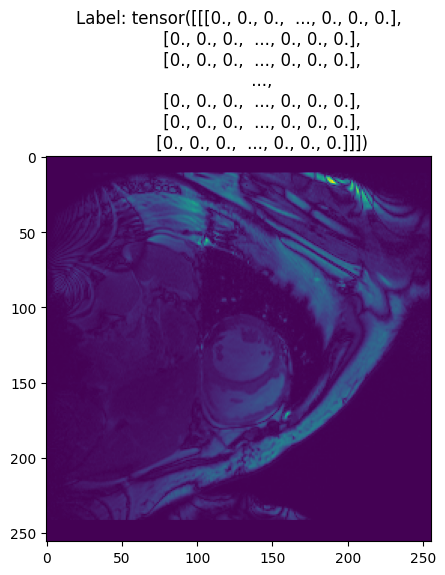

Image 1 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


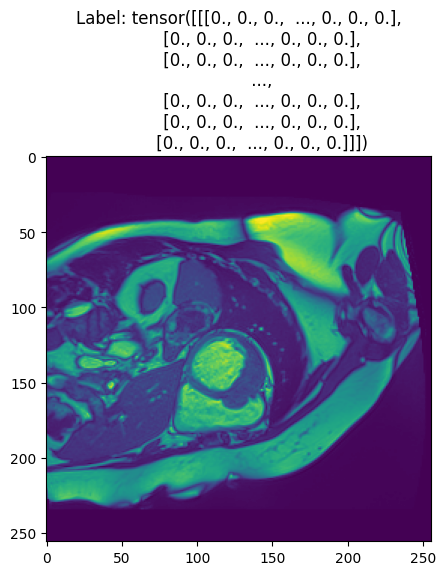

Image 2 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


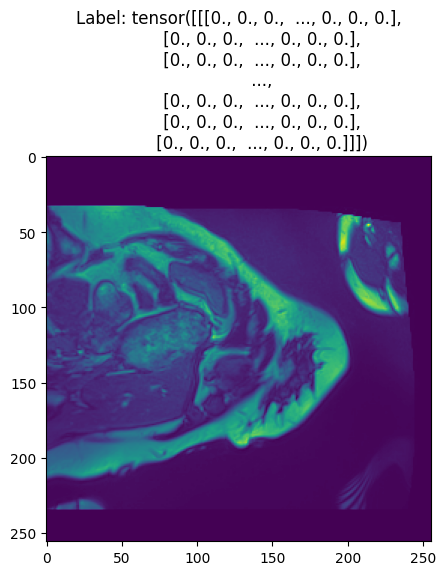

Image 3 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


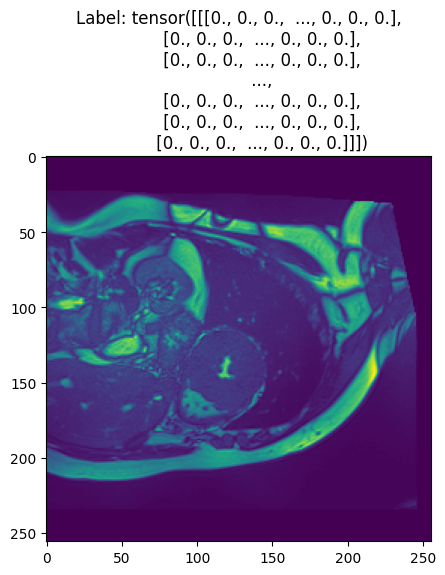

Image 4 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


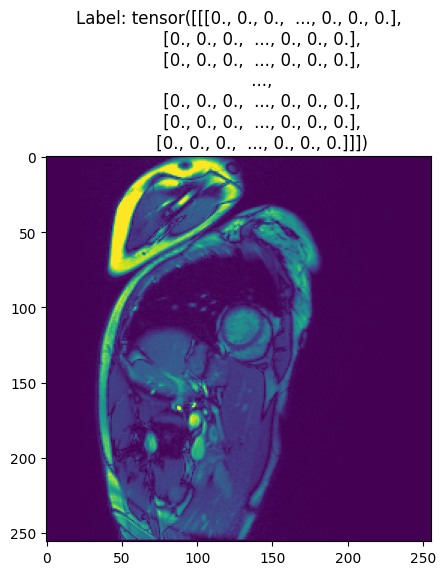

Image 5 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


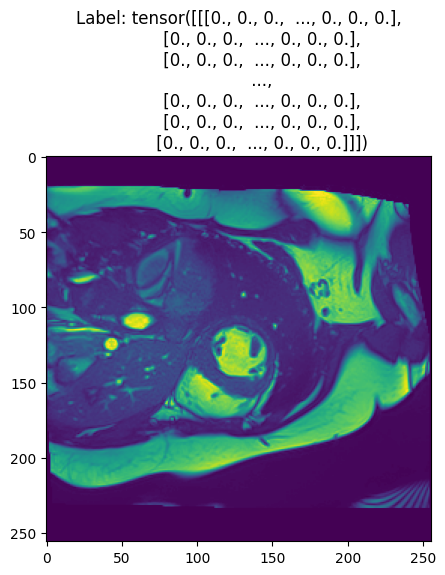

Image 6 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


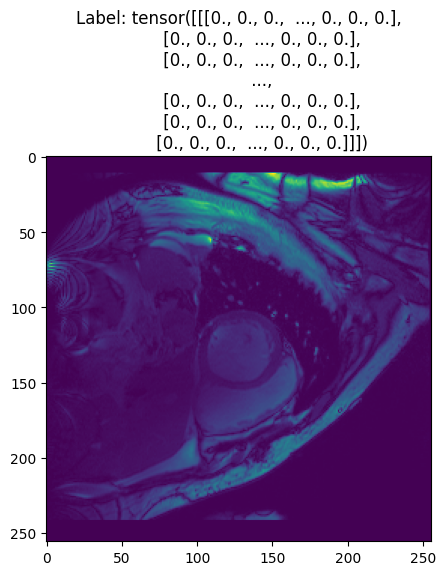

Image 7 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


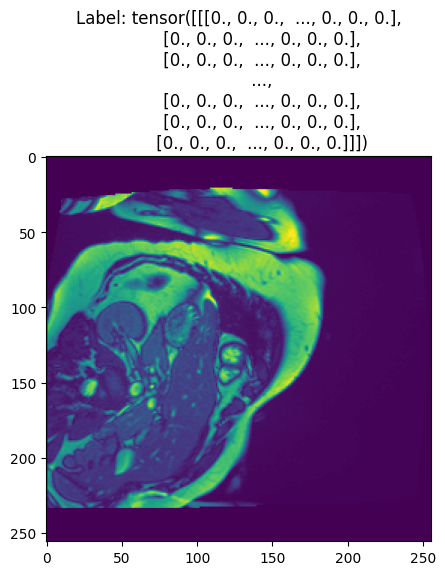

Image 8 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


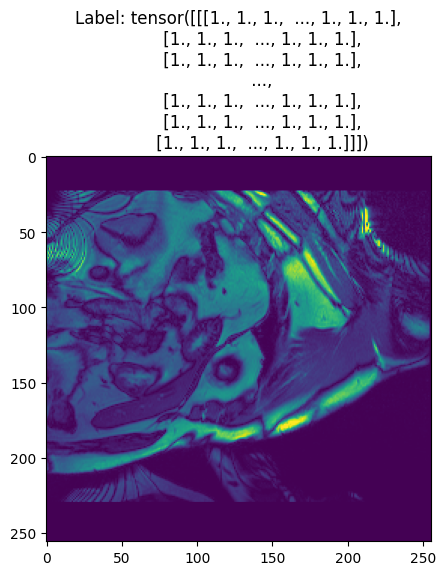

Image 9 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


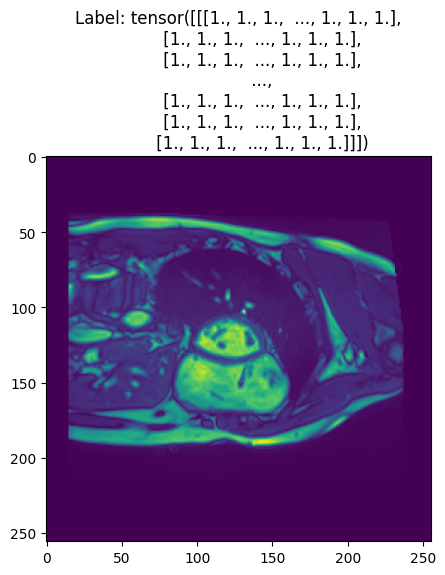

Image 10 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


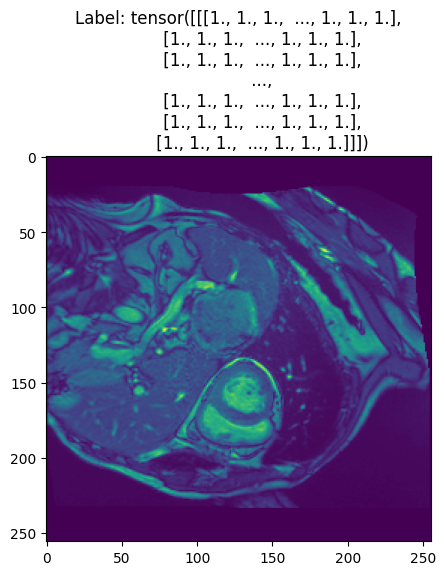

Image 11 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


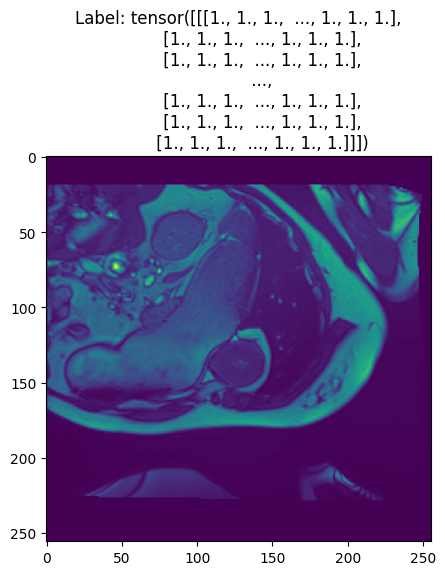

Image 12 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


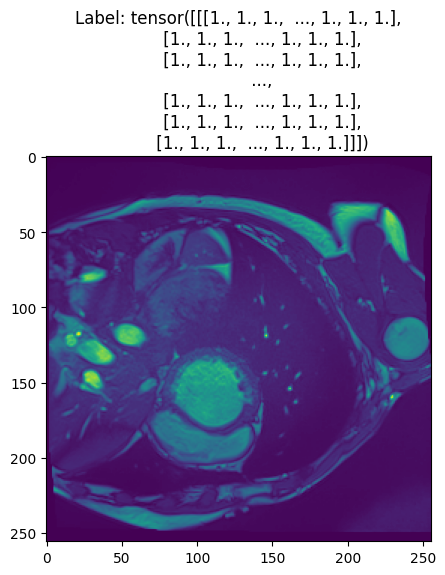

Image 13 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


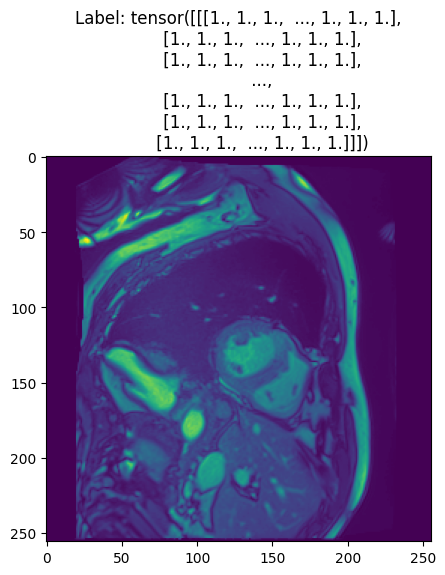

Image 14 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


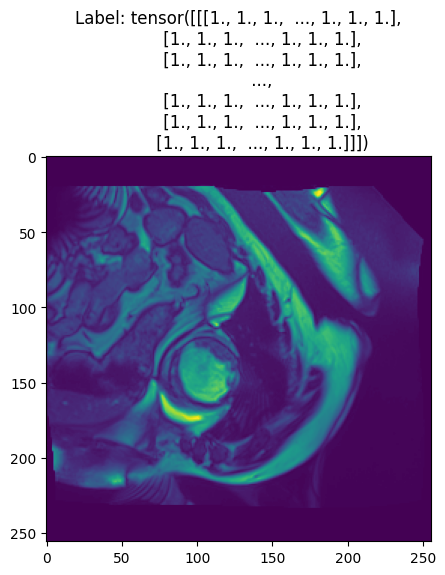

Image 15 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


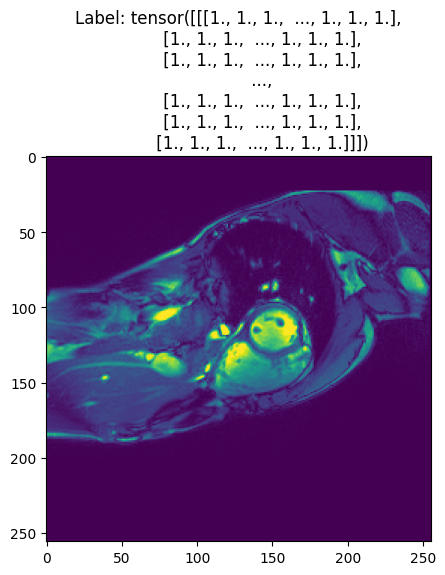

Image 16 with Label: tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


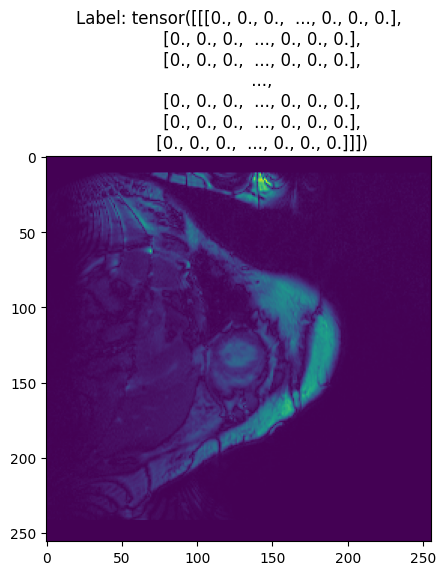

Image 17 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


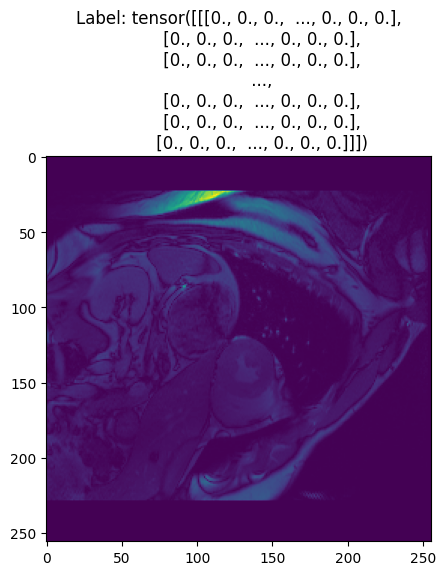

Image 18 with Label: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [14]:
runTraining()